In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import calendar
os.chdir(r"C:\Users\Henry\Desktop\Project2_HtmlSite")

In [3]:
#Match the pattern (‘csv’) and save the list of file names in the ‘all_filenames’ variable. 
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [5]:
# Make a reference to the file path
csv_path = "combined_csv.csv"

# Import the combined_csv file as a DataFrame
citibike_df = pd.read_csv(csv_path, encoding="utf-8")
citibike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,170,2018-12-01 00:03:53.3860,2018-12-01 00:06:43.7160,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,26261,Subscriber,1975,1
1,172,2018-12-01 00:47:13.7340,2018-12-01 00:50:05.8160,3183,Exchange Place,40.716247,-74.033459,3481,York St,40.716490,-74.041050,26175,Subscriber,1988,1
2,247,2018-12-01 00:48:57.6960,2018-12-01 00:53:05.6780,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,29255,Subscriber,1990,1
3,406,2018-12-01 01:33:53.6630,2018-12-01 01:40:39.7480,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29275,Subscriber,1995,1
4,354,2018-12-01 06:26:52.5120,2018-12-01 06:32:46.5170,3183,Exchange Place,40.716247,-74.033459,3211,Newark Ave,40.721525,-74.046305,29658,Subscriber,1976,1


In [6]:
# Select Relevant Columns in new dataframe
citibike = citibike_df[['tripduration', 'starttime','stoptime', 'start station latitude', 'start station longitude', 
                                                 'usertype', 'birth year', 'gender']].copy()
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender
0,170,2018-12-01 00:03:53.3860,2018-12-01 00:06:43.7160,40.716247,-74.033459,Subscriber,1975,1
1,172,2018-12-01 00:47:13.7340,2018-12-01 00:50:05.8160,40.716247,-74.033459,Subscriber,1988,1
2,247,2018-12-01 00:48:57.6960,2018-12-01 00:53:05.6780,40.716247,-74.033459,Subscriber,1990,1
3,406,2018-12-01 01:33:53.6630,2018-12-01 01:40:39.7480,40.716247,-74.033459,Subscriber,1995,1
4,354,2018-12-01 06:26:52.5120,2018-12-01 06:32:46.5170,40.716247,-74.033459,Subscriber,1976,1


In [7]:
#Change gender to Unknown (0), Male (1), Female (2) - Per Citibike Data
citibike['gender'].replace([0,1,2],['Unknown','Male','Female'],inplace=True)
# # convert tripduration from seconds to minutes
# citibike['tripduration'] = (citibike['tripduration'] / 60).round(2)
#subtract birth year by 2019 to ascertain age of rider
citibike['birth year'] = citibike['birth year'] - 2019
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender
0,170,2018-12-01 00:03:53.3860,2018-12-01 00:06:43.7160,40.716247,-74.033459,Subscriber,-44,Male
1,172,2018-12-01 00:47:13.7340,2018-12-01 00:50:05.8160,40.716247,-74.033459,Subscriber,-31,Male
2,247,2018-12-01 00:48:57.6960,2018-12-01 00:53:05.6780,40.716247,-74.033459,Subscriber,-29,Male
3,406,2018-12-01 01:33:53.6630,2018-12-01 01:40:39.7480,40.716247,-74.033459,Subscriber,-24,Male
4,354,2018-12-01 06:26:52.5120,2018-12-01 06:32:46.5170,40.716247,-74.033459,Subscriber,-43,Male


In [8]:
#convert birth year negative numbers into positive numbers
citibike['birth year2'] = citibike['birth year']*-1
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender,birth year2
0,170,2018-12-01 00:03:53.3860,2018-12-01 00:06:43.7160,40.716247,-74.033459,Subscriber,-44,Male,44
1,172,2018-12-01 00:47:13.7340,2018-12-01 00:50:05.8160,40.716247,-74.033459,Subscriber,-31,Male,31
2,247,2018-12-01 00:48:57.6960,2018-12-01 00:53:05.6780,40.716247,-74.033459,Subscriber,-29,Male,29
3,406,2018-12-01 01:33:53.6630,2018-12-01 01:40:39.7480,40.716247,-74.033459,Subscriber,-24,Male,24
4,354,2018-12-01 06:26:52.5120,2018-12-01 06:32:46.5170,40.716247,-74.033459,Subscriber,-43,Male,43


In [9]:
#Change StartTime to Year and Time Column and Month to Month Column
citibike['starttime'] = pd.to_datetime(citibike['starttime'])
citibike['stoptime'] = pd.to_datetime(citibike['stoptime'])
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender,birth year2
0,170,2018-12-01 00:03:53.386,2018-12-01 00:06:43.716,40.716247,-74.033459,Subscriber,-44,Male,44
1,172,2018-12-01 00:47:13.734,2018-12-01 00:50:05.816,40.716247,-74.033459,Subscriber,-31,Male,31
2,247,2018-12-01 00:48:57.696,2018-12-01 00:53:05.678,40.716247,-74.033459,Subscriber,-29,Male,29
3,406,2018-12-01 01:33:53.663,2018-12-01 01:40:39.748,40.716247,-74.033459,Subscriber,-24,Male,24
4,354,2018-12-01 06:26:52.512,2018-12-01 06:32:46.517,40.716247,-74.033459,Subscriber,-43,Male,43


In [10]:
# Rename comlumns
citibike2 = citibike.rename(columns={'birth year2': 'age'})
citibike2.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender,age
0,170,2018-12-01 00:03:53.386,2018-12-01 00:06:43.716,40.716247,-74.033459,Subscriber,-44,Male,44
1,172,2018-12-01 00:47:13.734,2018-12-01 00:50:05.816,40.716247,-74.033459,Subscriber,-31,Male,31
2,247,2018-12-01 00:48:57.696,2018-12-01 00:53:05.678,40.716247,-74.033459,Subscriber,-29,Male,29
3,406,2018-12-01 01:33:53.663,2018-12-01 01:40:39.748,40.716247,-74.033459,Subscriber,-24,Male,24
4,354,2018-12-01 06:26:52.512,2018-12-01 06:32:46.517,40.716247,-74.033459,Subscriber,-43,Male,43


In [11]:
#Extract Month, Day of the Week, Time from startime column and stoptime column and drop birth year
citibike2 = citibike2[['tripduration', 'starttime','start station latitude', 'start station longitude', 
                                                 'usertype', 'gender', 'age']].copy()
citibike2.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,gender,age
0,170,2018-12-01 00:03:53.386,40.716247,-74.033459,Subscriber,Male,44
1,172,2018-12-01 00:47:13.734,40.716247,-74.033459,Subscriber,Male,31
2,247,2018-12-01 00:48:57.696,40.716247,-74.033459,Subscriber,Male,29
3,406,2018-12-01 01:33:53.663,40.716247,-74.033459,Subscriber,Male,24
4,354,2018-12-01 06:26:52.512,40.716247,-74.033459,Subscriber,Male,43


In [12]:
citibike2['starttime'] = pd.to_datetime(citibike2['starttime'])
citibike2.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,gender,age
0,170,2018-12-01 00:03:53.386,40.716247,-74.033459,Subscriber,Male,44
1,172,2018-12-01 00:47:13.734,40.716247,-74.033459,Subscriber,Male,31
2,247,2018-12-01 00:48:57.696,40.716247,-74.033459,Subscriber,Male,29
3,406,2018-12-01 01:33:53.663,40.716247,-74.033459,Subscriber,Male,24
4,354,2018-12-01 06:26:52.512,40.716247,-74.033459,Subscriber,Male,43


In [13]:
#Add Year to Year Column and Month to Month Column
citibike2['starttime - Day'] = citibike2['starttime'].dt.day
citibike2['starttime - Month'] = citibike2['starttime'].dt.month_name()
citibike2['starttime - Time'] = citibike2['starttime'].dt.time
citibike2['starttime - Weekday'] = citibike2['starttime'].dt.weekday
citibike2.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,170,2018-12-01 00:03:53.386,40.716247,-74.033459,Subscriber,Male,44,1,December,00:03:53.386000,5
1,172,2018-12-01 00:47:13.734,40.716247,-74.033459,Subscriber,Male,31,1,December,00:47:13.734000,5
2,247,2018-12-01 00:48:57.696,40.716247,-74.033459,Subscriber,Male,29,1,December,00:48:57.696000,5
3,406,2018-12-01 01:33:53.663,40.716247,-74.033459,Subscriber,Male,24,1,December,01:33:53.663000,5
4,354,2018-12-01 06:26:52.512,40.716247,-74.033459,Subscriber,Male,43,1,December,06:26:52.512000,5


In [14]:
#Replace Weekday Numbers with Days of the Week
citibike2['starttime - Weekday'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)
citibike2.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,170,2018-12-01 00:03:53.386,40.716247,-74.033459,Subscriber,Male,44,1,December,00:03:53.386000,Saturday
1,172,2018-12-01 00:47:13.734,40.716247,-74.033459,Subscriber,Male,31,1,December,00:47:13.734000,Saturday
2,247,2018-12-01 00:48:57.696,40.716247,-74.033459,Subscriber,Male,29,1,December,00:48:57.696000,Saturday
3,406,2018-12-01 01:33:53.663,40.716247,-74.033459,Subscriber,Male,24,1,December,01:33:53.663000,Saturday
4,354,2018-12-01 06:26:52.512,40.716247,-74.033459,Subscriber,Male,43,1,December,06:26:52.512000,Saturday


In [15]:
#Drop Starttime and Stoptime Columns
citibike2.drop(columns=["starttime"], inplace=True)
citibike2.head()

,tripduration,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,170,40.716247,-74.033459,Subscriber,Male,44,1,December,00:03:53.386000,Saturday
1,172,40.716247,-74.033459,Subscriber,Male,31,1,December,00:47:13.734000,Saturday
2,247,40.716247,-74.033459,Subscriber,Male,29,1,December,00:48:57.696000,Saturday
3,406,40.716247,-74.033459,Subscriber,Male,24,1,December,01:33:53.663000,Saturday
4,354,40.716247,-74.033459,Subscriber,Male,43,1,December,06:26:52.512000,Saturday


In [16]:
#Value Count of Starttime - Weekday Trips
weekdaytrips_df = citibike2['starttime - Weekday'].value_counts().reset_index().rename(columns={'index': 'Weekday', "starttime - Weekday": 'Count'})
weekdaytrips_df["Weekday Number"] = (2, 1, 4, 3, 0, 5, 6)
weekdaytrips_df = weekdaytrips_df.sort_values('Weekday Number',ascending=True)
weekdaytrips_df

,Weekday,Count,Weekday Number
4,Monday,27903,0
1,Tuesday,29776,1
0,Wednesday,31521,2
3,Thursday,28746,3
2,Friday,29234,4
5,Saturday,23677,5
6,Sunday,19816,6


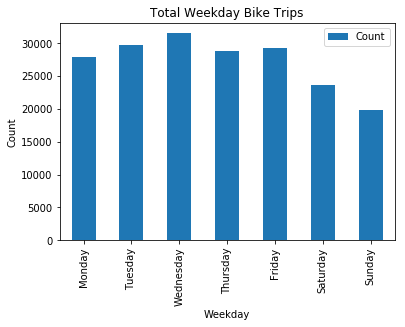

In [17]:
#Bar Graph for Monthly Trips
weekdaytrips_df.plot.bar(x= 'Weekday', y = 'Count')
plt.rcParams['figure.figsize'] = (10,6)
plt.ylabel('Count')
plt.title('Total Weekday Bike Trips')
plt.bar
fig1 = plt.gcf()

In [18]:
#Save Image of Graph
fig1.savefig("./Images/WeekdayCount.png")

FileNotFoundError: [Errno 2] No such file or directory: './Images/WeekdayCount.png'

In [19]:
#Value Count of Starttime - Weekday Trips
monthlytrips_df = citibike2['starttime - Month'].value_counts().reset_index().rename(columns={'index': 'Month', "starttime - Month": 'Count'})
monthlytrips_df["Month Number"] = (6,7,5,4,3,1,2)
monthlytrips_df = monthlytrips_df.sort_values('Month Number',ascending=True)
monthlytrips_df

,Month,Count,Month Number
5,January,19676,1
6,February,18565,2
4,December,20205,3
3,March,23606,4
2,April,33056,5
0,June,39430,6
1,May,36135,7


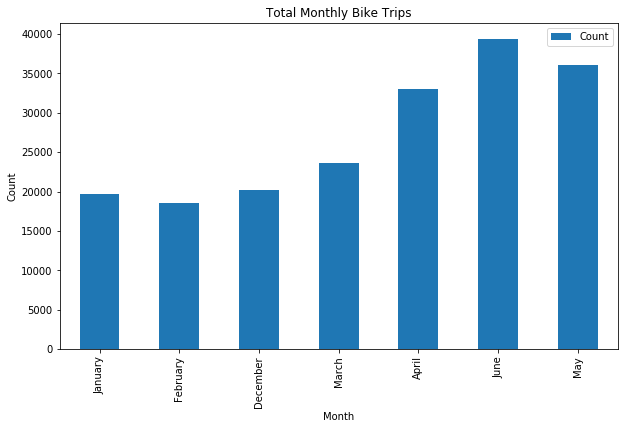

In [20]:
#Bar Graph for Monthly Trips
monthlytrips_df.plot.bar(x= 'Month', y = 'Count')
plt.rcParams['figure.figsize'] = (10,6)
plt.ylabel('Count')
plt.title('Total Monthly Bike Trips')
plt.bar
fig1 = plt.gcf()